Задание 1

In [ ]:
import pandas as pd

data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

completed_data = data[data['Order Status'] == 'Completed']
popular_payments = completed_data.groupby('Customer ID')['Payment Method'].apply(
    lambda x: x.value_counts().index[0]
)
total_sums = completed_data.groupby('Customer ID')['Total Price'].sum()
add_total_sums = completed_data.groupby('Customer ID')['Add-on Total'].sum()

output = pd.DataFrame({
    'Popular Payment Method': popular_payments,
    'Total sum': total_sums,
    'Add-on Total': add_total_sums

}).reset_index()


output.columns = ['Customer ID', 'Popular Payment Method', 'Total sum','Add-on Total sum']
print(output)

      Customer ID Popular Payment Method  Total sum  Add-on Total sum
0            1000                 Paypal     741.09             26.09
1            1002            Credit Card    5020.60             63.16
2            1003                   Cash      41.50             35.56
3            1004            Credit Card      83.00             65.78
4            1005                 Paypal   11779.11             75.33
...           ...                    ...        ...               ...
9461        19990                 PayPal    9117.44            113.56
9462        19991            Credit Card   12368.06              0.00
9463        19995            Credit Card    5394.56              0.00
9464        19996          Bank Transfer   12063.02            198.98
9465        19998          Bank Transfer     674.32              0.00

[9466 rows x 4 columns]


Задание 2

  Shipping Type  Total Price
0     Expedited   8430385.58
1       Express   5632093.35
2     Overnight   5887722.52
3      Same Day   8292376.50
4      Standard  14387037.62


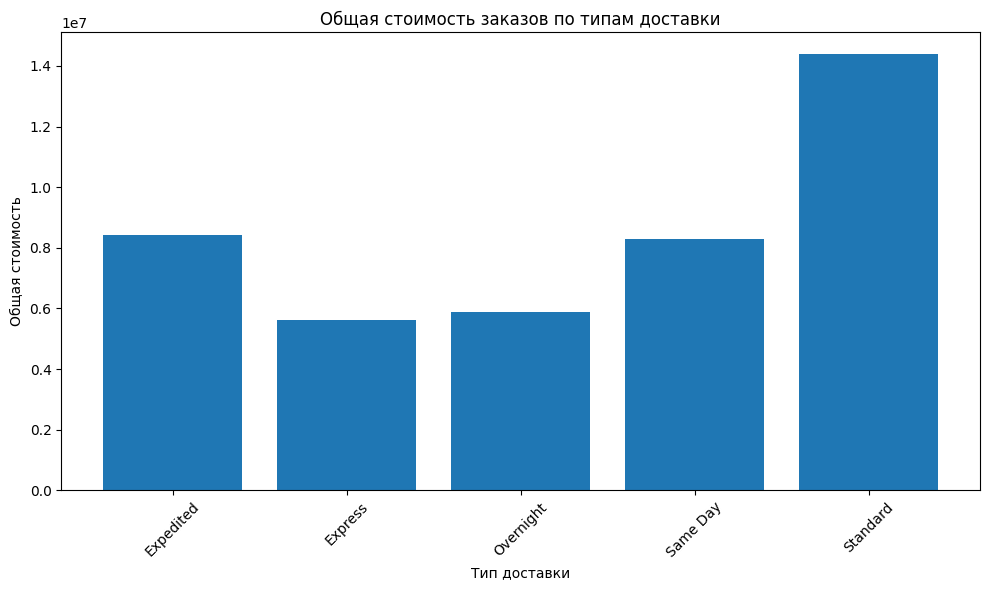

In [1]:
""" ДОХОД ПО КАЖДОМУ МЕТОДУ ДОСТАВКИ"""
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

completed_data = data[data['Order Status'] == 'Completed']

output = completed_data.groupby("Shipping Type")["Total Price"].apply(
    lambda x: x.sum()
).reset_index()
print(output)


plt.figure(figsize=(10, 6))
plt.bar(output['Shipping Type'], output['Total Price'])
plt.title('Общая стоимость заказов по типам доставки')
plt.xlabel('Тип доставки')
plt.ylabel('Общая стоимость')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  Product Type  Total Price
0   Headphones   2734651.00
1       Laptop   8365905.25
2   Smartphone  14407835.84
3   Smartwatch   9398591.23
4       Tablet   7722632.25


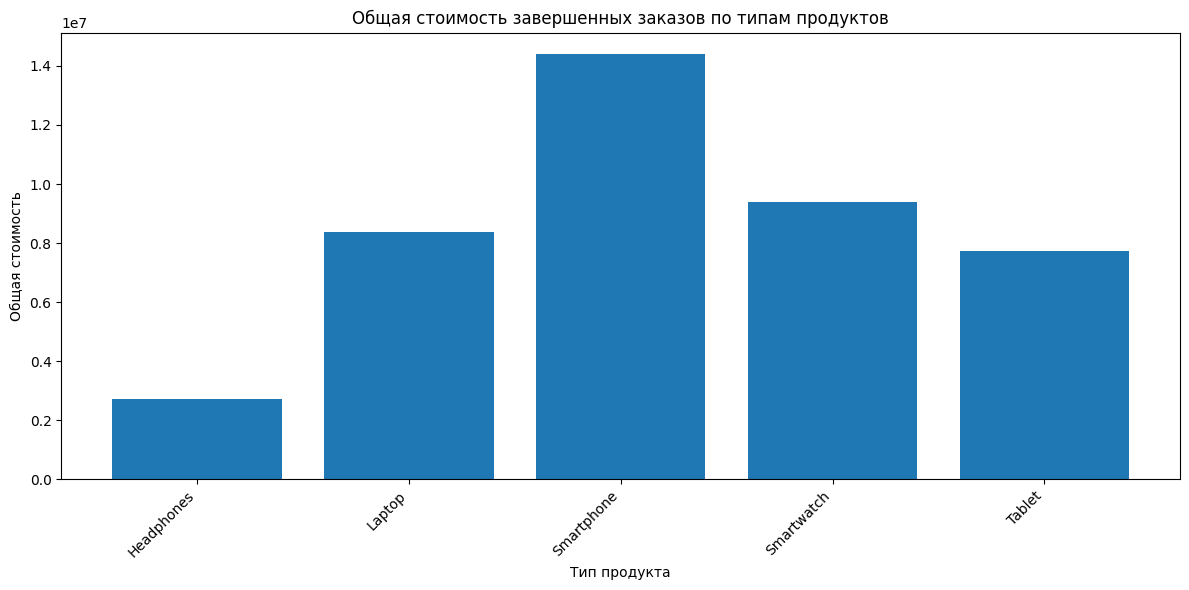

In [2]:
"""ДОХОД ПО ТИПУ ПРОДУКТА"""
import pandas as pd

data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

completed_data = data[data['Order Status'] == 'Completed']

output = completed_data.groupby("Product Type")["Total Price"].apply(
    lambda x: x.sum()
).reset_index()
print(output)


plt.figure(figsize=(12, 6))
plt.bar(output['Product Type'], output['Total Price'])
plt.title('Общая стоимость завершенных заказов по типам продуктов')
plt.xlabel('Тип продукта')
plt.ylabel('Общая стоимость')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

      Месяц  Доход по доп. услугам
0   2023-09                8012.62
1   2023-10               37837.12
2   2023-11               34888.81
3   2023-12               33509.15
4   2024-01              136195.16
5   2024-02              120148.92
6   2024-03              124954.26
7   2024-04              123973.59
8   2024-05              132018.51
9   2024-06              126689.59
10  2024-07              132017.20
11  2024-08              135133.14
12  2024-09               99518.89


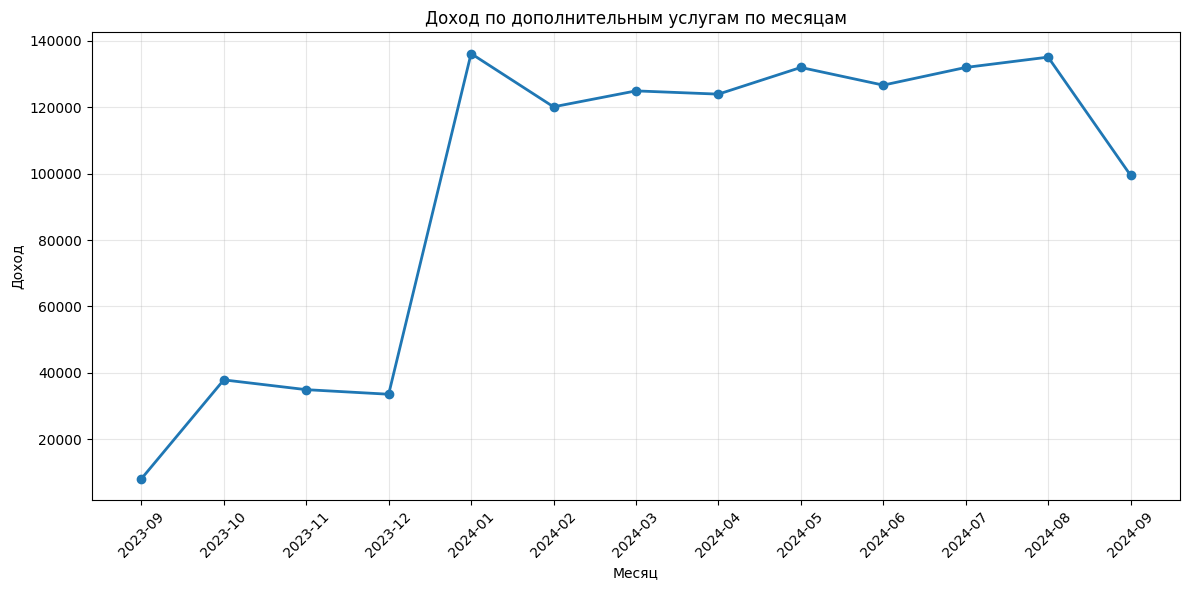

In [7]:
"""ДОХОД ПО ДОП УСЛУГАМ ЗА КАЖДЫЙ МЕСЯЦ"""
import pandas as pd

data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')
output_month = data.groupby(
    data['Purchase Date'].str[:7])\
["Add-on Total"].apply(lambda x: x.sum()).reset_index()
output_month.columns = ['Месяц', 'Доход по доп. услугам']
print(output_month)

plt.figure(figsize=(12, 6))
plt.plot(output_month['Месяц'], output_month['Доход по доп. услугам'], marker='o', linewidth=2)
plt.title('Доход по дополнительным услугам по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Квартал  Доход по доп. услугам
 2023Q3                8012.62
 2023Q4              106235.08
 2024Q1              381298.34
 2024Q2              382681.69
 2024Q3              366669.23


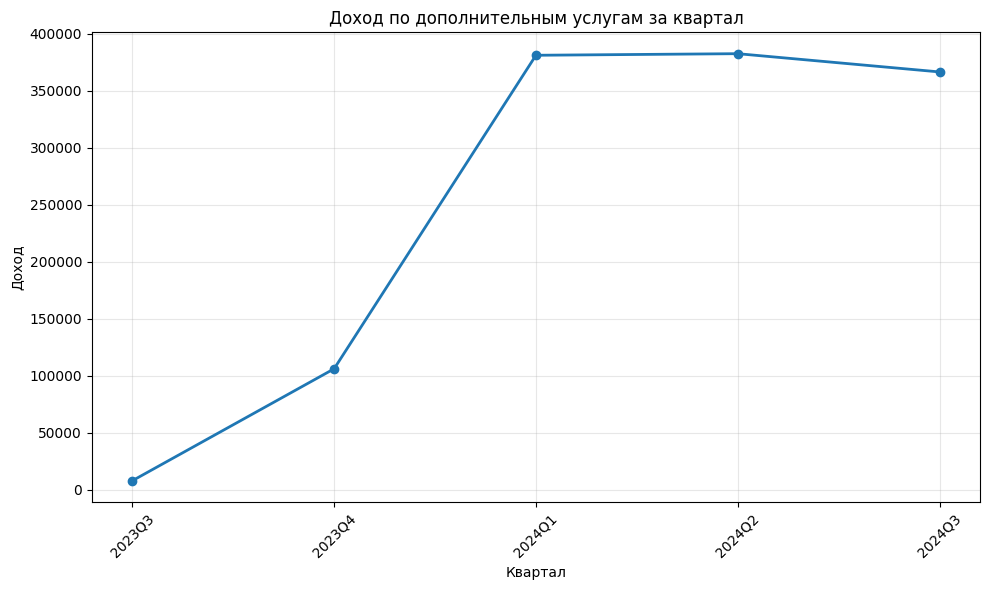

In [3]:
"""ДОХОД ПО ДОП УСЛУГАМ ЗА КВАРТАЛ"""
import pandas as pd

data = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

data['Purchase Date'] = pd.to_datetime(data['Purchase Date'])

quarterly_revenue = data.groupby(data['Purchase Date'].dt.to_period('Q'))['Add-on Total'].sum().reset_index()

quarterly_revenue.columns = ['Квартал', 'Доход по доп. услугам']
quarterly_revenue['Доход по доп. услугам'] = quarterly_revenue['Доход по доп. услугам'].round(2)

print(quarterly_revenue.to_string(index=False))


plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue['Квартал'].astype(str), quarterly_revenue['Доход по доп. услугам'], marker='o', linewidth=2)
plt.title('Доход по дополнительным услугам за квартал')
plt.xlabel('Квартал')
plt.ylabel('Доход')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()